# Part1: Define encoders

# Import libraries

In [1]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt

from models.activity import ActivityRecorder
from models.dendrites import Dendrite
from models.currents import ConstantCurrent, NoisyCurrent, SetCurrent, CurrentSum
from models.encoders import TimeToFirstSpikeEncoder, NumberEncoder, PoissonEncoder, FeedDataset
from models.neurons import LIF
from models.synapses import SimpleSynapse, FullyConnectedSynapse, RandomConnectedFixedProbSynapse, \
    RandomConnectedFixedInputSynapse
from models.time_res import TimeResolution
from simulate import Simulation
from utils.images import CustomImage


# 1- Time to first spike

## Let's test our model with a simple array

### use normal $\theta$

In [2]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset = TimeToFirstSpikeEncoder(dataset=[[250, 200, 150, 120, 100, 70, 40, 30, 10, 0]],
                                         duration=7,
                                         theta=1)

ng_inp = sim.add_neuron_group(
    tag="ng_inp",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_event")
    }
)


sim.simulate(iterations=10)

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.TimeToFirstSpikeEncoder object at 0x7c3b73f12990>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_event,)}
10xBatch: 1/1 (100%) 5.881ms


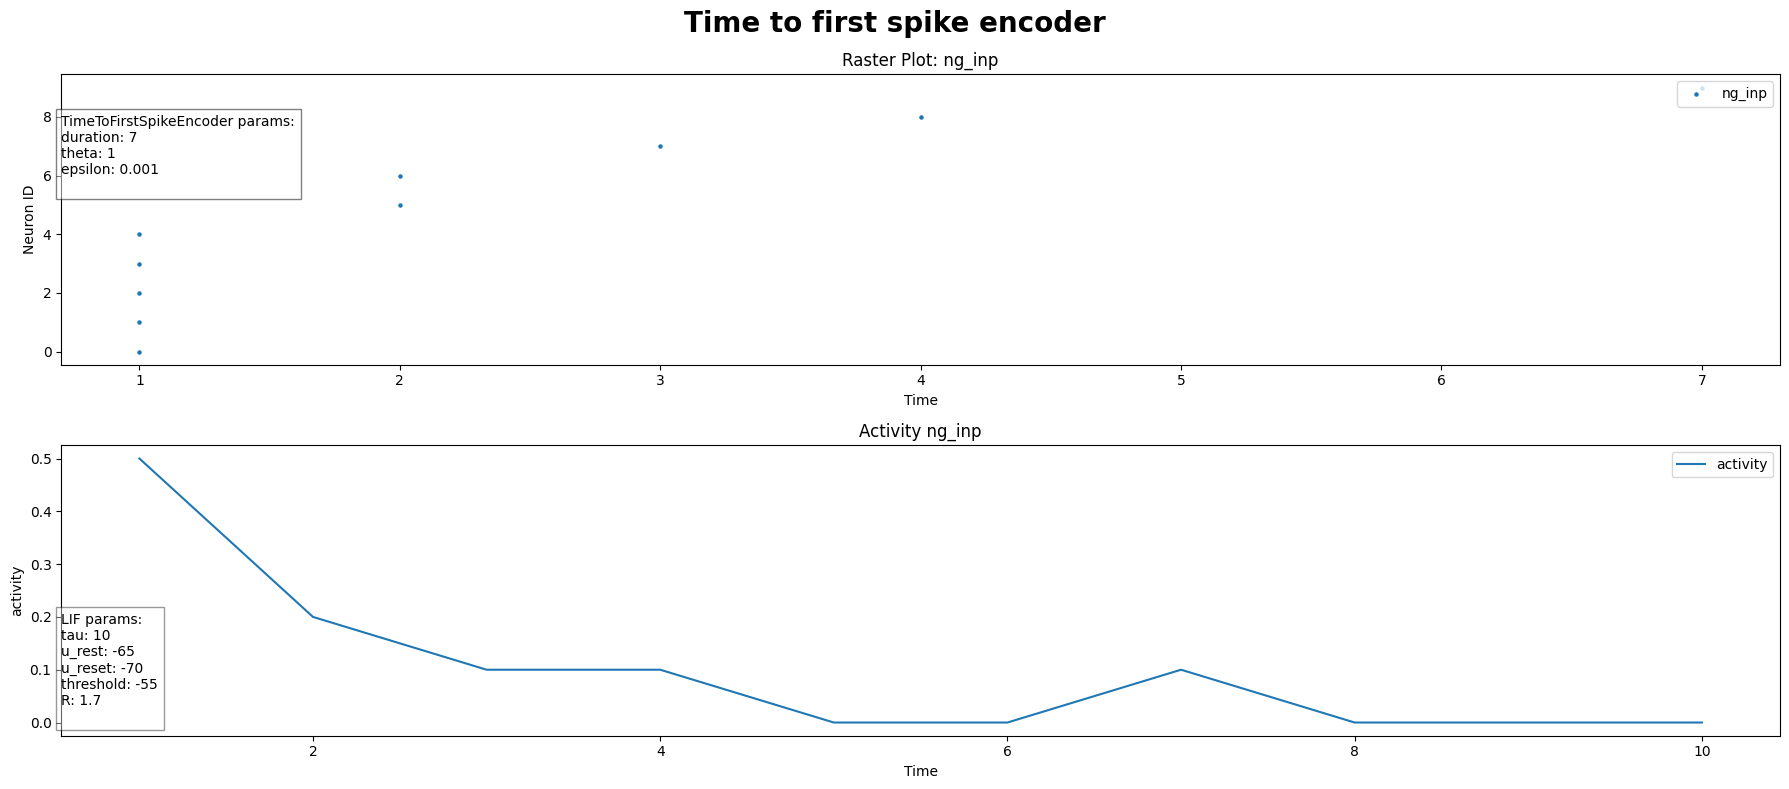

In [3]:
# fig, axs = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(2, 1, 1)  # 3 rows, 1 column, first plot
ng_inp.add_raster_plot(ax1)
encoded_dataset.add_encoder_info(ax1, text_y=0.6)

# ng1.add_current_params_info(axs[1], current_idx=2)
ax2 = fig.add_subplot(2, 1, 2)
ng_inp.add_activity_plot(ax2)
ng_inp.add_neuron_model_params_info(ax2, model_idx=6)

# ax3 = fig.add_subplot(3, 1, 3)
# ax3.axis('off')

fig.suptitle("Time to first spike encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-ttfs-array-encoding.pdf")
plt.show()

## Change in $\theta$

In [4]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset_low = TimeToFirstSpikeEncoder(dataset=[[250, 200, 150, 120, 100, 70, 40, 30, 10, 0]],
                                         duration=7,
                                         theta=0.01)
encoded_dataset_mid = TimeToFirstSpikeEncoder(dataset=[[250, 200, 150, 120, 100, 70, 40, 30, 10, 0]],
                                         duration=7,
                                         theta=1)
encoded_dataset_high = TimeToFirstSpikeEncoder(dataset=[[250, 200, 150, 120, 100, 70, 40, 30, 10, 0]],
                                         duration=7,
                                         theta=100)
ng_inp_low = sim.add_neuron_group(
    tag="ng_inp_low",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset_low,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_low_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_low_event")
    }
)

ng_inp_mid = sim.add_neuron_group(
    tag="ng_inp_mid",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset_mid,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_mid_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_mid_event")
    }
)

ng_inp_high = sim.add_neuron_group(
    tag="ng_inp_high",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset_high,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_high_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_high_event")
    }
)
sim.simulate(iterations=10)

Network['Network_1', 'Network'](Neurons: tensor(30)|3 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp_low', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.TimeToFirstSpikeEncoder object at 0x7c3b50c27490>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_low_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_low_event,)}
NeuronGroup['ng_inp_mid', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.TimeToFirstSpikeEncoder object at 0x7c3b53831350>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'ac

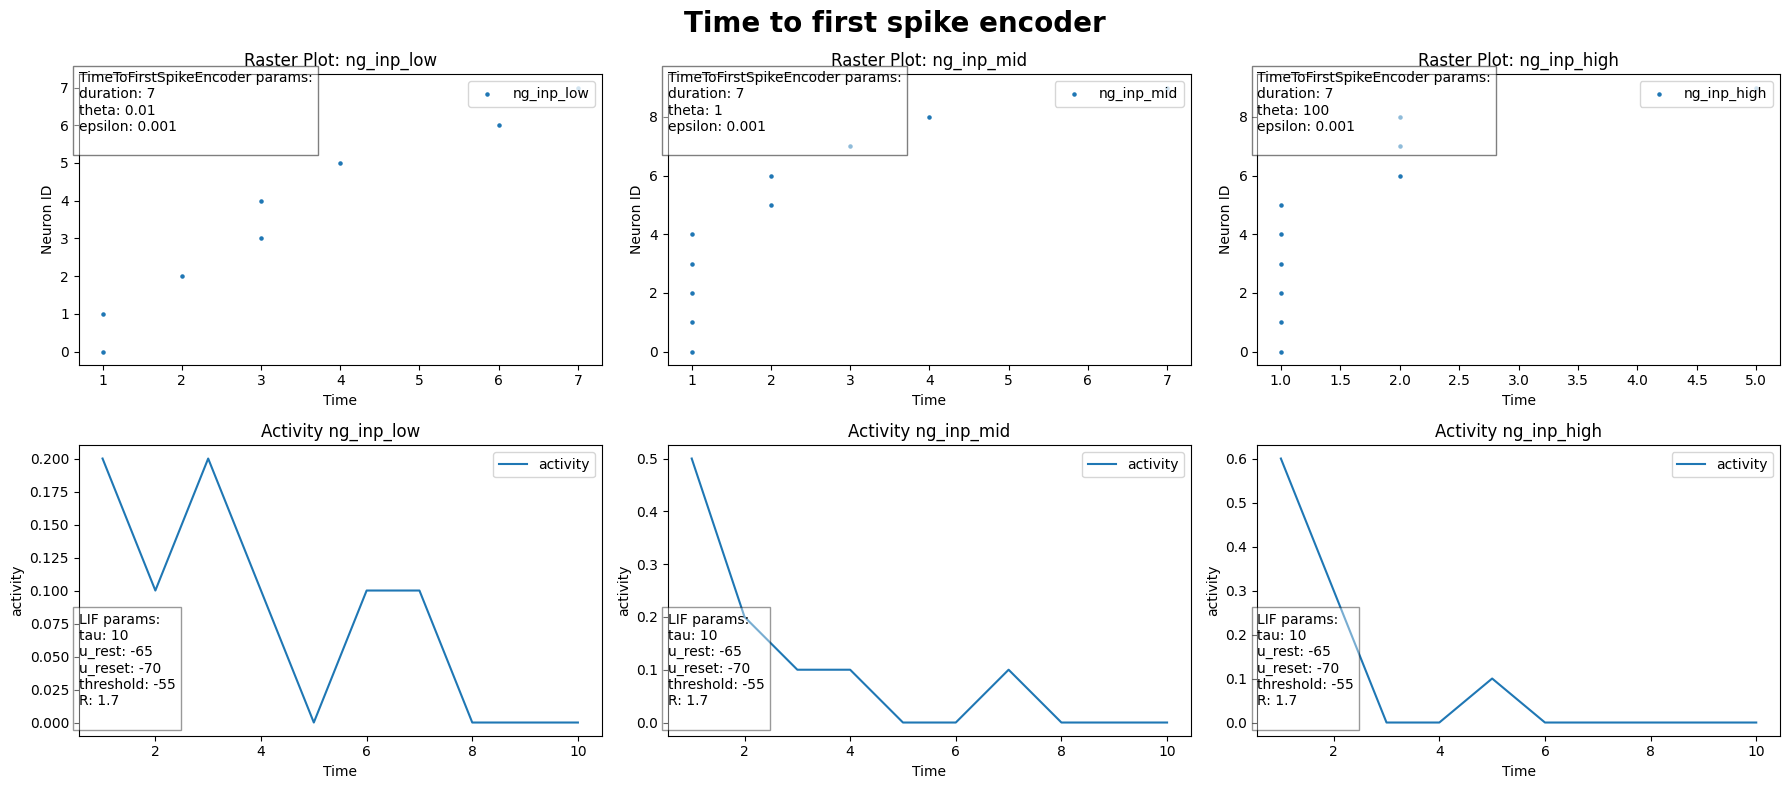

In [5]:
# fig, axs = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(2, 3, 1)  # 3 rows, 1 column, first plot
ng_inp_low.add_raster_plot(ax1)
encoded_dataset_low.add_encoder_info(ax1, text_y=0.75)

ax2 = fig.add_subplot(2, 3, 2)
ng_inp_mid.add_raster_plot(ax2)
encoded_dataset_mid.add_encoder_info(ax2, text_y=0.75)

ax3 = fig.add_subplot(2, 3, 3)
ng_inp_high.add_raster_plot(ax3)
encoded_dataset_high.add_encoder_info(ax3, text_y=0.75)


ax4 = fig.add_subplot(2, 3, 4)
ng_inp_low.add_activity_plot(ax4)
ng_inp_low.add_neuron_model_params_info(ax4, model_idx=6)

ax5 = fig.add_subplot(2, 3, 5)
ng_inp_mid.add_activity_plot(ax5)
ng_inp_mid.add_neuron_model_params_info(ax5, model_idx=6)

ax6 = fig.add_subplot(2, 3, 6)
ng_inp_high.add_activity_plot(ax6)
ng_inp_high.add_neuron_model_params_info(ax6, model_idx=6)


fig.suptitle("Time to first spike encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-ttfs-array-encoding-change-in-theta.pdf")
plt.show()

### Change in duration

In [6]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset_low = TimeToFirstSpikeEncoder(dataset=[[250, 200, 150, 120, 100, 70, 40, 30, 10, 0]],
                                         duration=5,
                                         theta=0.01)
encoded_dataset_mid = TimeToFirstSpikeEncoder(dataset=[[250, 200, 150, 120, 100, 70, 40, 30, 10, 0]],
                                         duration=7,
                                         theta=0.01)
encoded_dataset_high = TimeToFirstSpikeEncoder(dataset=[[250, 200, 150, 120, 100, 70, 40, 30, 10, 0]],
                                         duration=10,
                                         theta=0.01)
ng_inp_low = sim.add_neuron_group(
    tag="ng_inp_low",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset_low,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_low_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_low_event")
    }
)

ng_inp_mid = sim.add_neuron_group(
    tag="ng_inp_mid",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset_mid,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_mid_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_mid_event")
    }
)

ng_inp_high = sim.add_neuron_group(
    tag="ng_inp_high",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset_high,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_high_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_high_event")
    }
)
sim.simulate(iterations=10)

Network['Network_1', 'Network'](Neurons: tensor(30)|3 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp_low', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.TimeToFirstSpikeEncoder object at 0x7c3b53679b90>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_low_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_low_event,)}
NeuronGroup['ng_inp_mid', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.TimeToFirstSpikeEncoder object at 0x7c3b535e5410>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'ac

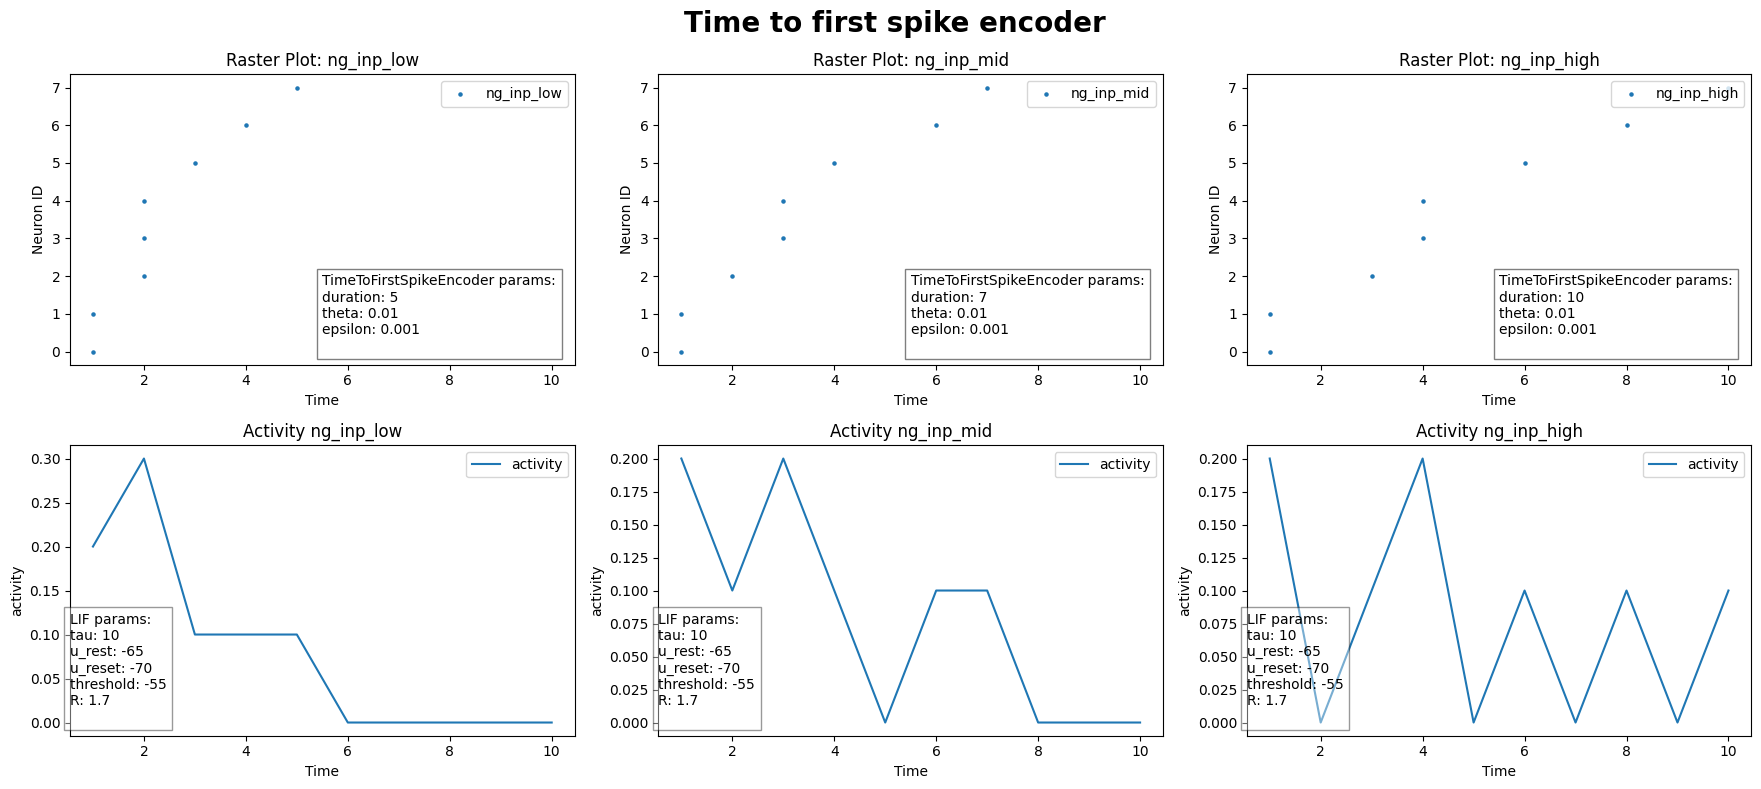

In [7]:
# fig, axs = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(2, 3, 1)  # 3 rows, 1 column, first plot
ng_inp_low.add_raster_plot(ax1)
encoded_dataset_low.add_encoder_info(ax1, text_x=0.5)

ax2 = fig.add_subplot(2, 3, 2, sharex=ax1)
ng_inp_mid.add_raster_plot(ax2)
encoded_dataset_mid.add_encoder_info(ax2, text_x=0.5)

ax3 = fig.add_subplot(2, 3, 3, sharex=ax2)
ng_inp_high.add_raster_plot(ax3)
encoded_dataset_high.add_encoder_info(ax3, text_x=0.5)


ax4 = fig.add_subplot(2, 3, 4)
ng_inp_low.add_activity_plot(ax4)
ng_inp_low.add_neuron_model_params_info(ax4, model_idx=6)

ax5 = fig.add_subplot(2, 3, 5)
ng_inp_mid.add_activity_plot(ax5)
ng_inp_mid.add_neuron_model_params_info(ax5, model_idx=6)

ax6 = fig.add_subplot(2, 3, 6)
ng_inp_high.add_activity_plot(ax6)
ng_inp_high.add_neuron_model_params_info(ax6, model_idx=6)


fig.suptitle("Time to first spike encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-ttfs-array-encoding-change-in-duration.pdf")
plt.show()

## use image as input

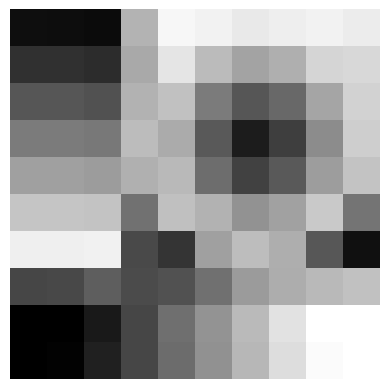

In [8]:
img1 = CustomImage('dataset/slope.tif')
img1.resize_image(10, 10)
img1.img_show()

In [9]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset = TimeToFirstSpikeEncoder(dataset=[img1.img2tensor()],
                                 duration=50,
                                 theta=0.01)

ng_inp = sim.add_neuron_group(
    tag="ng_inp",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_event")
    }
)


sim.simulate(iterations=50)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.TimeToFirstSpikeEncoder object at 0x7c3b532cf8d0>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_event,)}
50xBatch: 1/1 (100%) 26.916ms


/home/amir/Documents/university/Semester 8/Neuroscience/hw3/models/encoders.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  self.dataset = torch.tensor(self.dataset)


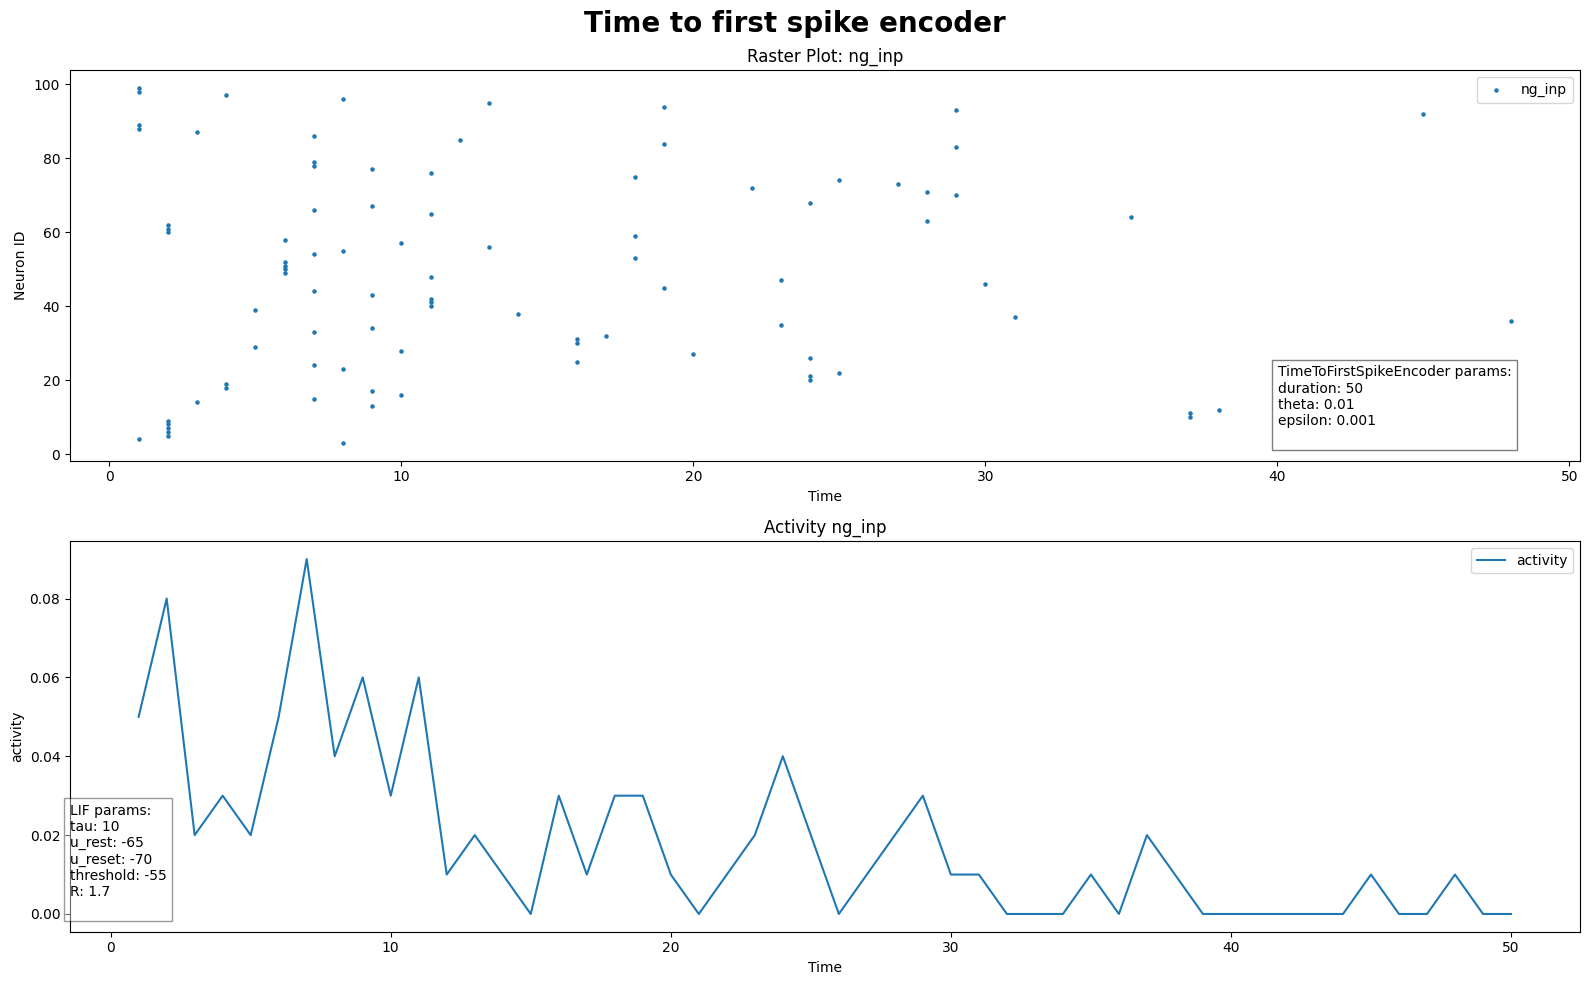

In [10]:
# fig, axs = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(16, 10))



ax1 = fig.add_subplot(2, 1, 1)  # 3 rows, 1 column, first plot
ng_inp.add_raster_plot(ax1)
encoded_dataset.add_encoder_info(ax1, text_x=0.8)

# ng1.add_current_params_info(axs[1], current_idx=2)
ax2 = fig.add_subplot(2, 1, 2)
ng_inp.add_activity_plot(ax2)
ng_inp.add_neuron_model_params_info(ax2, model_idx=6)

# ax3 = fig.add_subplot(3, 1, 3)
# ax3.axis('off')

fig.suptitle("Time to first spike encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-ttfs-image-encoding.pdf")
plt.show()

# 2- Number Encoder(using normal distribution)

In [11]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset = NumberEncoder(dataset=[4.7],
                                 duration=20)

ng_inp = sim.add_neuron_group(
    tag="ng_inp",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_event")
    }
)


sim.simulate(iterations=21)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.NumberEncoder object at 0x7c3b532a5d50>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_event,)}
21xBatch: 1/1 (100%) 12.407ms


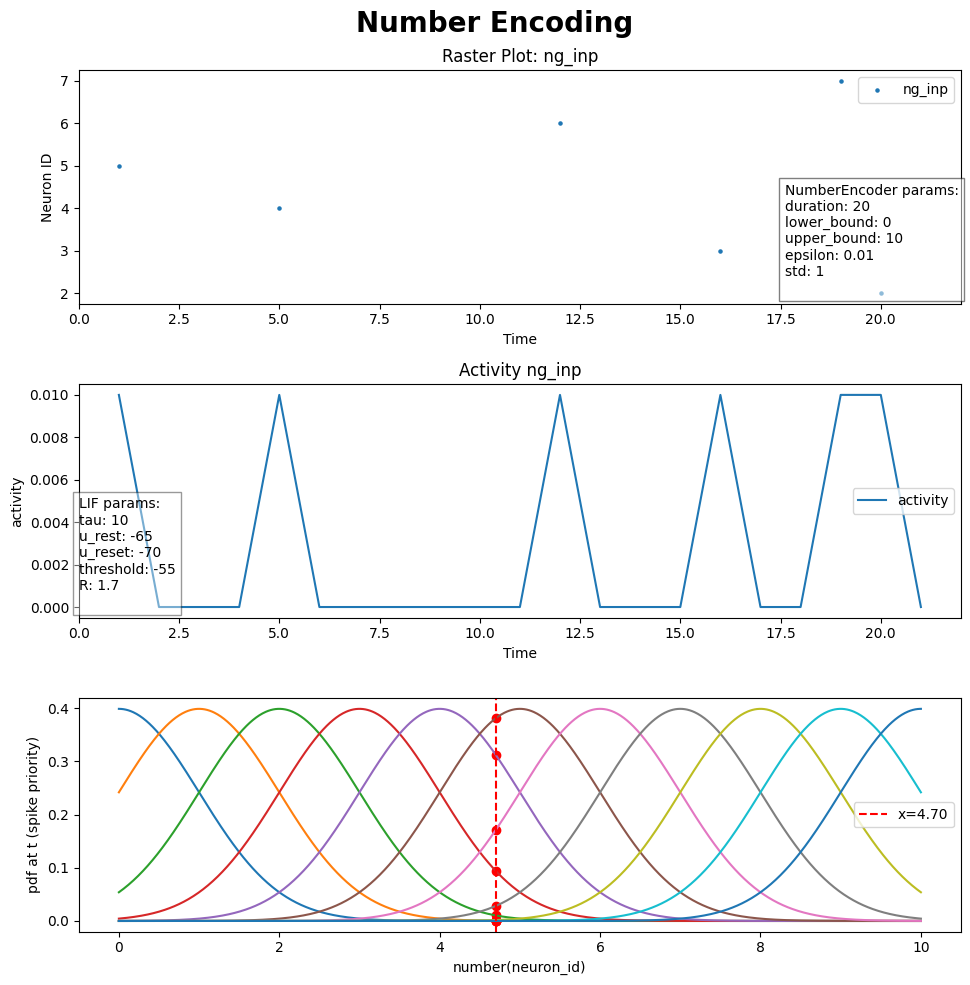

In [12]:
# fig, axs = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(10, 10))


ax1 = fig.add_subplot(3, 1, 1)  # 3 rows, 1 column, first plot
ng_inp.add_raster_plot(ax1)
encoded_dataset.add_encoder_info(ax1, text_x=0.8)


ax2 = fig.add_subplot(3, 1, 2, sharex=ax1)  # 3 rows, 1 column, first plot
ng_inp.add_activity_plot(ax2)
ng_inp.add_neuron_model_params_info(ax2, model_idx=6)

ax3 = fig.add_subplot(3, 1, 3)  # 3 rows, 1 column, first plot
encoded_dataset.plot_x(ax3)


fig.suptitle("Number Encoding", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-number-encoding.pdf")
plt.show()

# 3-Poisson Encoding

## use an array as data

In [13]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset = PoissonEncoder(dataset=[[100, 70, 30, 10, 0]],
                                 duration=50,
                                 )

ng_inp = sim.add_neuron_group(
    tag="ng_inp",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_event")
    }
)


sim.simulate(iterations=50)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.PoissonEncoder object at 0x7c3b508d9350>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_event,)}
50xBatch: 1/1 (100%) 32.703ms


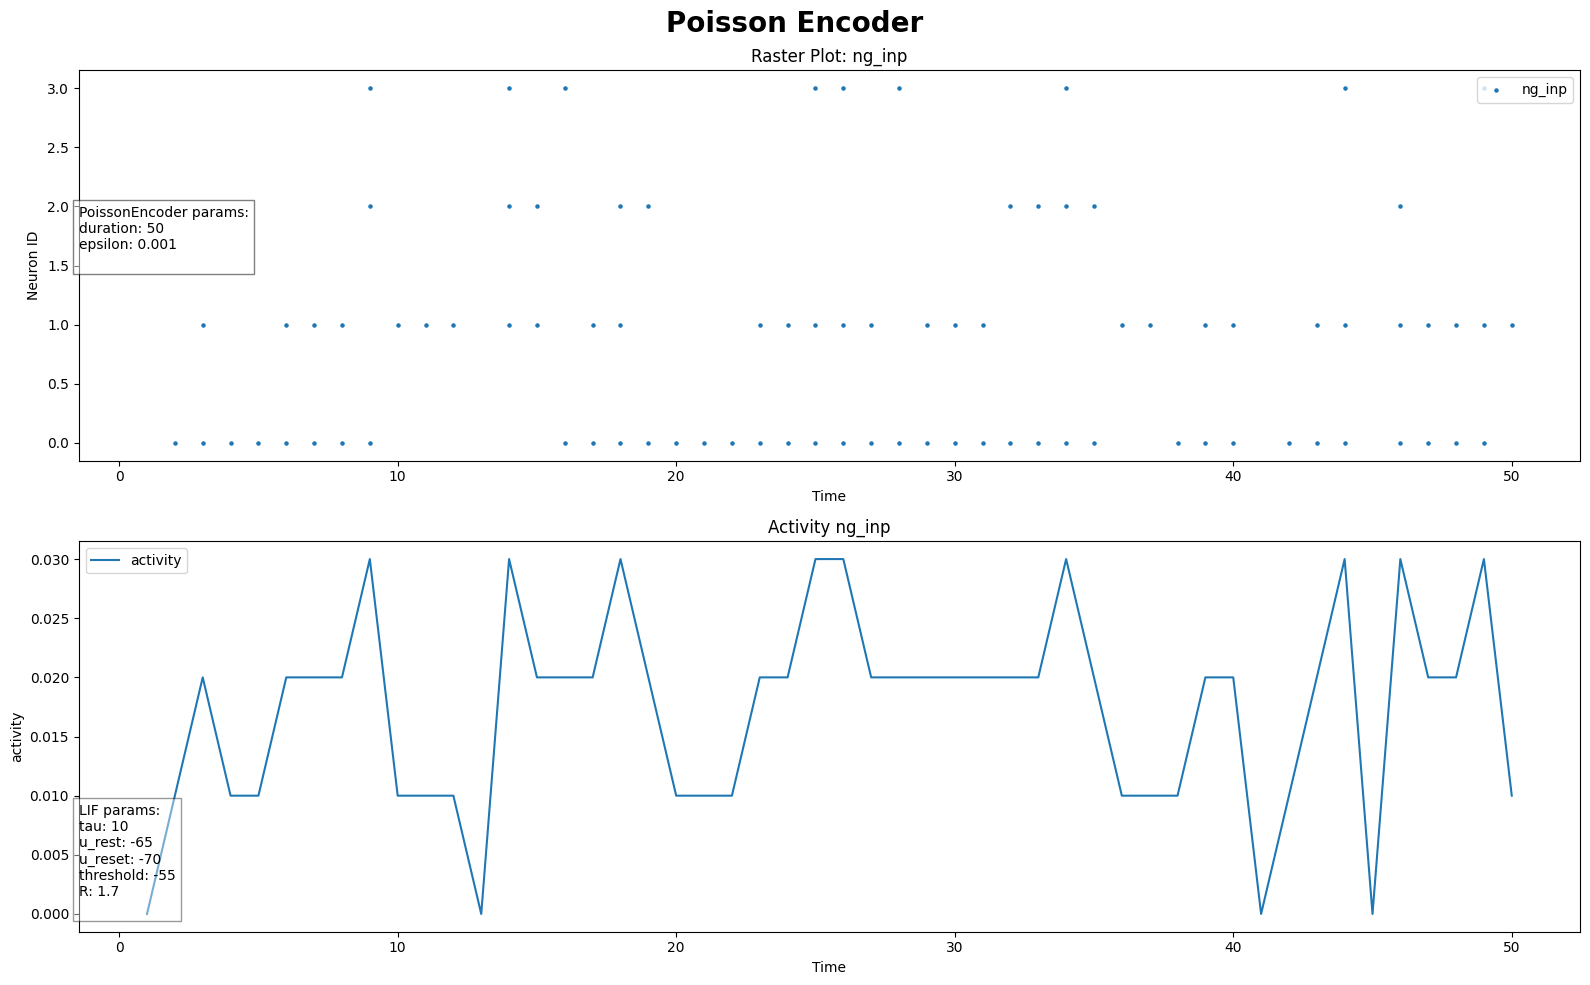

In [14]:
# fig, axs = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(16, 10))

# ng1.add_neuron_model_params_info(ax1, model_idx=7)

ax1 = fig.add_subplot(2, 1, 1)  # 3 rows, 1 column, first plot
ng_inp.add_raster_plot(ax1)
encoded_dataset.add_encoder_info(ax1, text_y=0.5)

ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)  # 3 rows, 1 column, first plot
ng_inp.add_activity_plot(ax2)
ng_inp.add_neuron_model_params_info(ax2, model_idx=6)

fig.suptitle("Poisson Encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-poisson-array-encoding.pdf")
plt.show()

## use an image as data

In [19]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset = PoissonEncoder(dataset=[img1.img2tensor()],
                                 duration=50,
                                 )

ng_inp = sim.add_neuron_group(
    tag="ng_inp",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset,
                       sleep=15),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_event")
    }
)


sim.simulate(iterations=50)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.PoissonEncoder object at 0x7c3b50634cd0>,sleep=15,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_event,)}
50xBatch: 1/1 (100%) 29.720ms


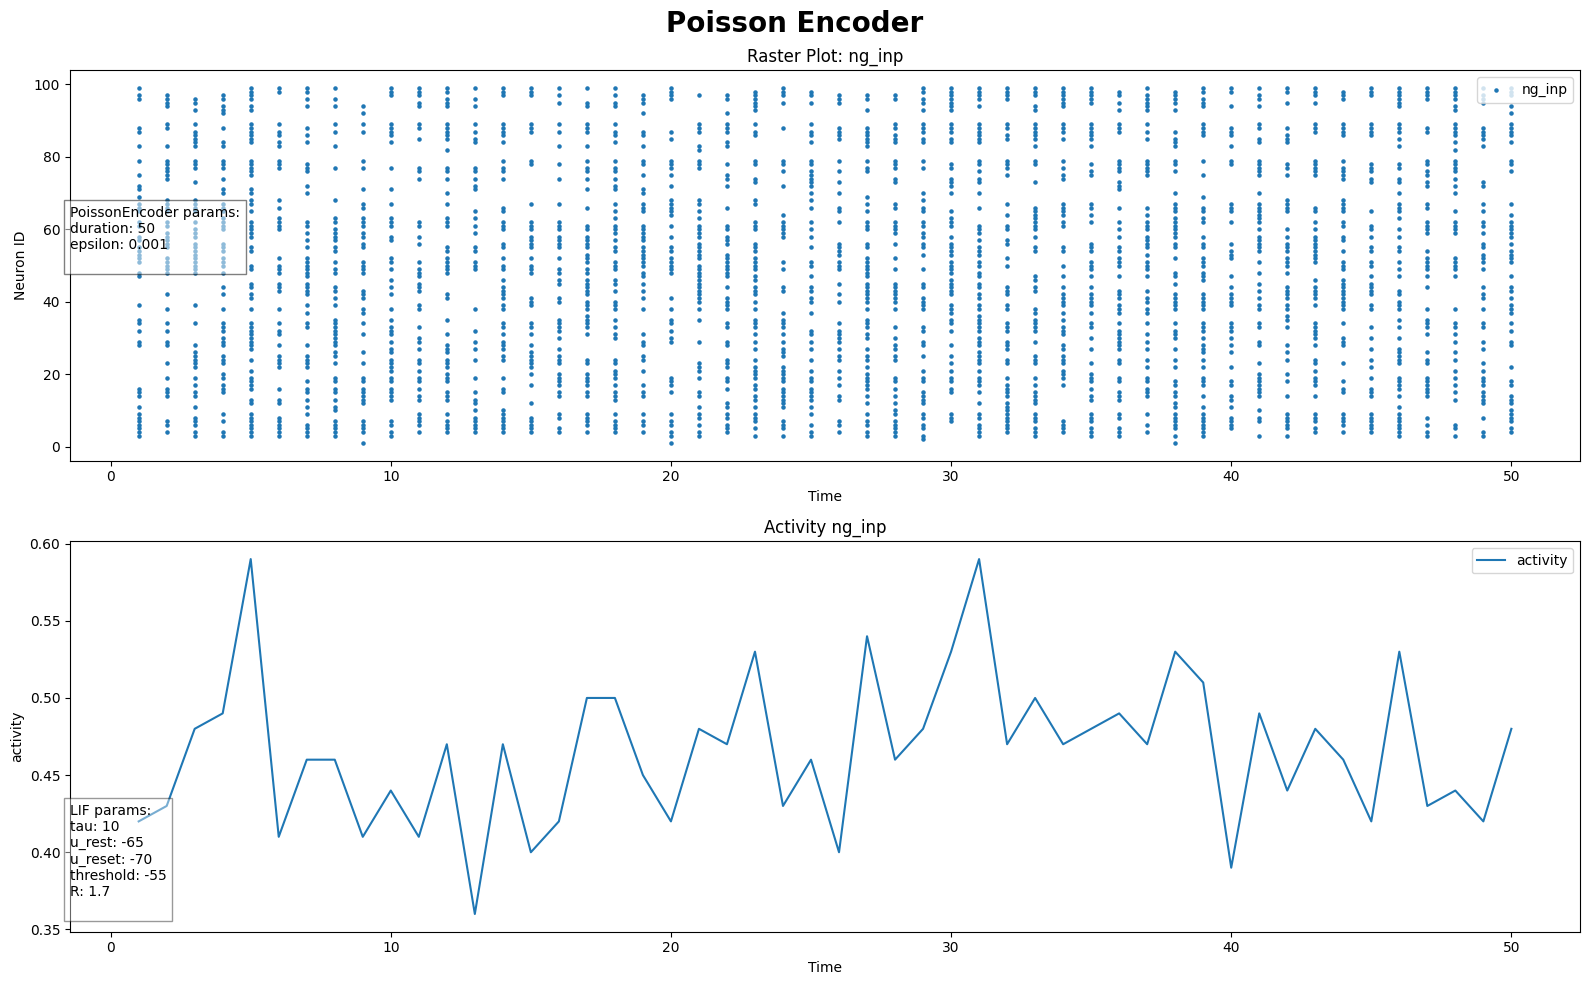

In [20]:
# fig, axs = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(16, 10))

# ng1.add_neuron_model_params_info(ax1, model_idx=7)

ax1 = fig.add_subplot(2, 1, 1)  # 3 rows, 1 column, first plot
ng_inp.add_raster_plot(ax1)
encoded_dataset.add_encoder_info(ax1, text_y=0.5)

ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)  # 3 rows, 1 column, first plot
ng_inp.add_activity_plot(ax2)
ng_inp.add_neuron_model_params_info(ax2, model_idx=6)

fig.suptitle("Poisson Encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-poisson-image-encoding.pdf")
plt.show()

### Change in duration

In [32]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)

encoded_dataset_low = PoissonEncoder(dataset=[img1.img2tensor()],
                                         duration=25)
encoded_dataset_mid = PoissonEncoder(dataset=[img1.img2tensor()],
                                         duration=50)
encoded_dataset_high = PoissonEncoder(dataset=[img1.img2tensor()],
                                         duration=100)
ng_inp_low = sim.add_neuron_group(
    tag="ng_inp_low",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset_low,
                       sleep=100),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_low_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_low_event")
    }
)

ng_inp_mid = sim.add_neuron_group(
    tag="ng_inp_mid",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset_mid,
                       sleep=100),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_mid_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_mid_event")
    }
)

ng_inp_high = sim.add_neuron_group(
    tag="ng_inp_high",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=0),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: FeedDataset(encoded_dataset=encoded_dataset_high,
                       sleep=100),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_inp_high_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inp_high_event")
    }
)
sim.simulate(iterations=100)

Network['Network_1', 'Network'](Neurons: tensor(30)|3 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_inp_low', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.PoissonEncoder object at 0x7c3b501917d0>,sleep=100,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_low_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_inp_low_event,)}
NeuronGroup['ng_inp_mid', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=0,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:FeedDataset(encoded_dataset=<models.encoders.PoissonEncoder object at 0x7c3b50208f90>,sleep=100,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_wid

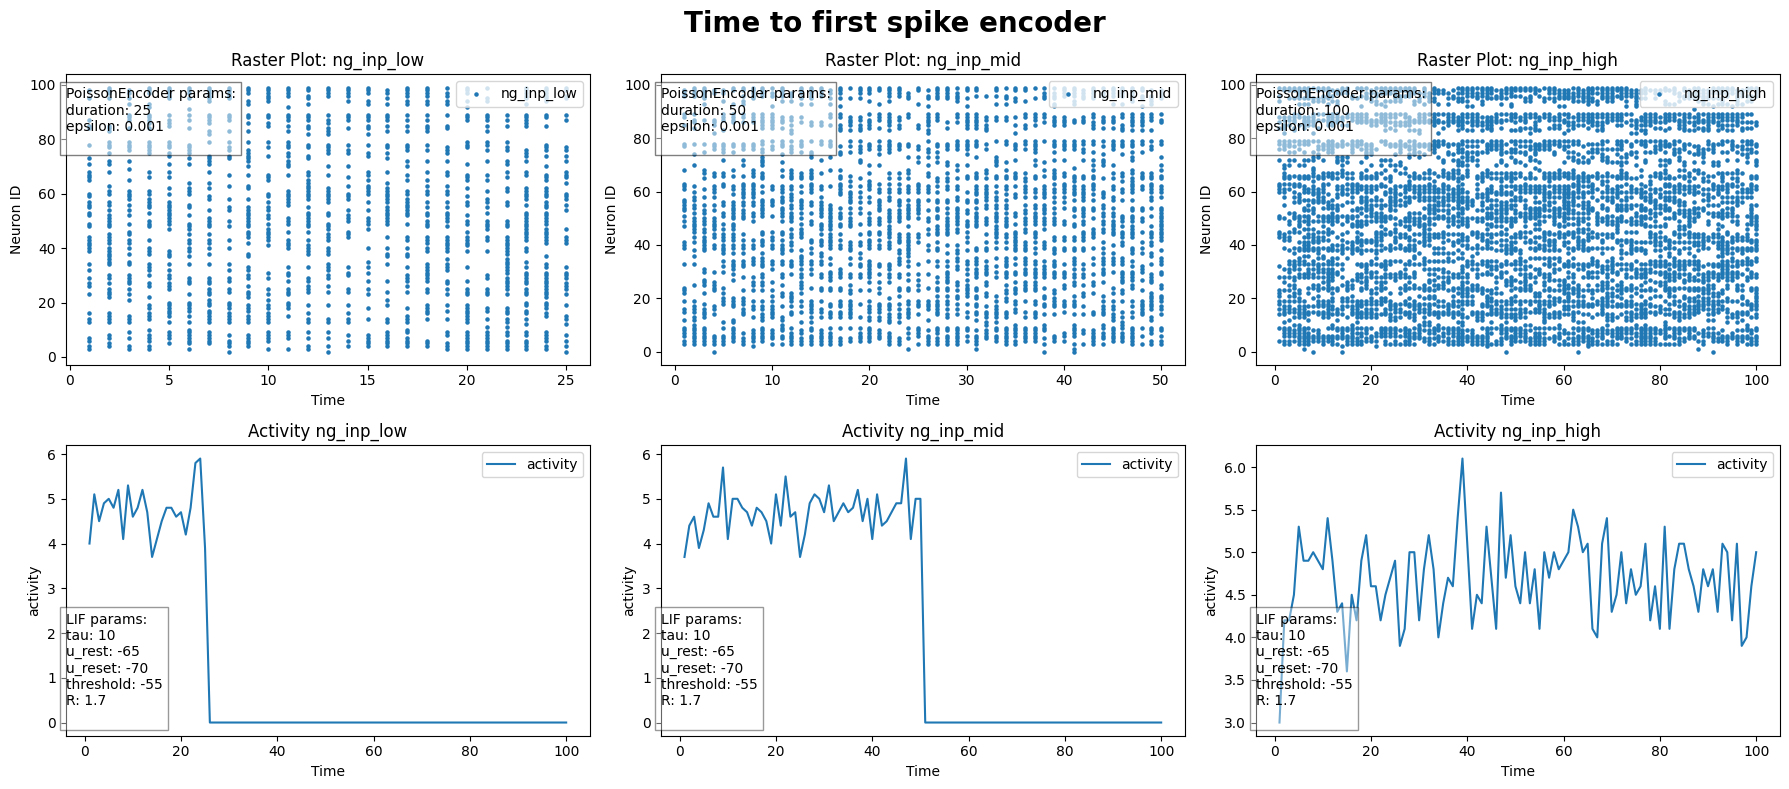

In [34]:
# fig, axs = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(2, 3, 1)  # 3 rows, 1 column, first plot
ng_inp_low.add_raster_plot(ax1)
encoded_dataset_low.add_encoder_info(ax1, text_y=0.75)

ax2 = fig.add_subplot(2, 3, 2)
ng_inp_mid.add_raster_plot(ax2)
encoded_dataset_mid.add_encoder_info(ax2, text_y=0.75)

ax3 = fig.add_subplot(2, 3, 3)
ng_inp_high.add_raster_plot(ax3)
encoded_dataset_high.add_encoder_info(ax3, text_y=0.75)


ax4 = fig.add_subplot(2, 3, 4)
ng_inp_low.add_activity_plot(ax4)
ng_inp_low.add_neuron_model_params_info(ax4, model_idx=6)

ax5 = fig.add_subplot(2, 3, 5)
ng_inp_mid.add_activity_plot(ax5)
ng_inp_mid.add_neuron_model_params_info(ax5, model_idx=6)

ax6 = fig.add_subplot(2, 3, 6)
ng_inp_high.add_activity_plot(ax6)
ng_inp_high.add_neuron_model_params_info(ax6, model_idx=6)


fig.suptitle("Time to first spike encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-ttfs-array-encoding-change-in-theta.pdf")
plt.show()